In [1]:
from annoy import AnnoyIndex
import pandas as pd
import numpy as np
import cv2
import sys  
import matplotlib.pyplot as plt
sys.path.insert(0, '../')
sys.path.insert(0, './utils')
from utils_color_extractor import ColorFeaturesExtractor
from retriever import Retriever
from utils import get_names_from_indexes

In [2]:
# extract feature from input img
img_path = './test_imgs/retrieval.jpg'
img = cv2.imread(img_path)
cfe = ColorFeaturesExtractor((24,26,3), 0.6)
img_features = cfe.extract(img, True)

In [3]:
df_names = pd.read_csv('./data/train_filtered.csv')

In [4]:
df_features = pd.read_csv('./data/color_features.csv', sep='\t', header=None)

In [5]:
df_features

,0,1,2,3,4,5,6,7,8,9,...,1862,1863,1864,1865,1866,1867,1868,1869,1870,1871
0,0.039475,0.058203,0.177503,0.000170,0.004069,0.054680,0.000928,0.007496,0.000885,0.007059,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.021525,0.025383,0.964980,0.002875,0.002195,0.000655,0.012483,0.002654,0.000066,0.028004,...,0.000074,0.000000,0.000008,0.000098,0.000000,0.000000,0.000172,0.000016,0.000000,0.000344
2,0.162461,0.037948,0.099669,0.002076,0.009049,0.006681,0.018682,0.015341,0.000032,0.018617,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.016409,0.014814,0.979491,0.000975,0.002638,0.000348,0.022632,0.001552,0.000000,0.026893,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000007,0.000000,0.000000
4,0.550011,0.024291,0.020641,0.000000,0.000126,0.000000,0.000126,0.004657,0.000000,0.000252,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26948,0.024202,0.053715,0.034427,0.009117,0.066035,0.062188,0.012922,0.081777,0.016810,0.018877,...,0.000000,0.000110,0.000342,0.000000,0.000137,0.000178,0.000000,0.000178,0.000068,0.000000
26949,0.082409,0.004243,0.180953,0.003159,0.002320,0.001317,0.001959,0.000128,0.000373,0.000280,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
26950,0.037196,0.183789,0.038038,0.003687,0.024543,0.013811,0.004050,0.116280,0.001124,0.038928,...,0.003184,0.000890,0.002891,0.001100,0.000620,0.001100,0.000164,0.000796,0.000854,0.000012
26951,0.008854,0.000113,0.004903,0.000092,0.000031,0.000778,0.000092,0.000072,0.000266,0.000082,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [4]:
# instantiate retriever
retriever = Retriever('./indexes/')

In [7]:
# create index
retriever.create_index(df_features, retrieval_mode='color', metric = 'euclidean')

In [5]:
# retrieve images
indexes = retriever.retrieve(img_features, retrieval_mode='color', n_neighbours=5, include_distances=False)

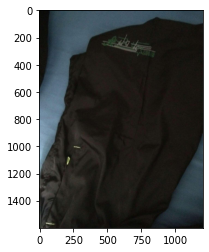

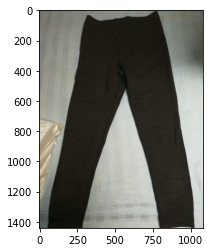

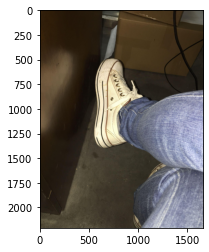

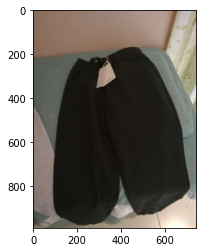

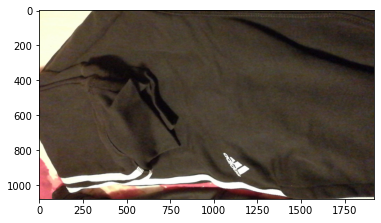

In [7]:
# get images names
names = get_names_from_indexes(indexes)
# show images
for i in range(0,len(names)):
    tmp = cv2.imread('../data/train/' + names[i])
    tmp = cv2.cvtColor(tmp, cv2.COLOR_BGR2RGB)
    plt.imshow(tmp)
    plt.show()

In [8]:
# test delete index
retriever.delete_index('color')